# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
rcParams['figure.figsize'] = 14,10
plt.style.use('ggplot')

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Save config information 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
weather_api_key

## Generate Cities List

In [57]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
## Build query URL and request your results in Fahrenheit
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

In [ ]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()
print(json.dumps(weather_json, indent=2))

In [72]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
max_temp = []
wind_speed = []
latitude = []
longitude = []

#Start the counter at 1
processing_record = 1

#Print starting log statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp"])
        wind_speed.append(response["wind"]["speed"])                                        
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
    
        #Increase counter by 1
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")    


Beginning Data Retrieval
-------------------------------
Processing Record 1 | Ponta do Sol
City not found. Skipping...
Processing Record 2 | Ushuaia
Processing Record 3 | Saint-Philippe
Processing Record 4 | Avarua
Processing Record 5 | Vardø
Processing Record 6 | Hue
Processing Record 7 | Oodweyne
Processing Record 8 | Tougue
Processing Record 9 | Erenhot
Processing Record 10 | Esperance
Processing Record 11 | Mahébourg
Processing Record 12 | Grindavik
Processing Record 13 | São Filipe
Processing Record 14 | Krasnyy Chikoy
City not found. Skipping...
Processing Record 15 | Busselton
Processing Record 16 | Buraidah
Processing Record 17 | Srednekolymsk
Processing Record 18 | Rikitea
Processing Record 19 | Zhicheng
Processing Record 20 | Cape Town
Processing Record 21 | Albany
Processing Record 22 | Atuona
Processing Record 23 | Mayo
Processing Record 24 | Qaanaaq
Processing Record 25 | Jamestown
Processing Record 26 | Martil
Processing Record 27 | George Town
Processing Record 28 | Pue

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [60]:
# Create a dictionary that hold this lists: Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               547
Country            547
Date               547
Latitude           547
Longitude          547
Max Temperature    547
Humidity           547
Cloudiness         547
Wind Speed         547
dtype: int64

In [62]:
#Display the DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Ponta do Sol,PT,1595291491,32.67,-17.10,69.01,64,40,12.75
1,Ushuaia,AR,1595291442,-54.80,-68.30,28.40,92,0,3.36
2,Saint-Philippe,RE,1595291473,-21.36,55.77,57.78,64,90,13.87
3,Avarua,CK,1595291471,-21.21,-159.78,78.80,74,100,19.46
4,Vardø,NO,1595291229,70.37,31.11,59.34,80,100,6.26


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

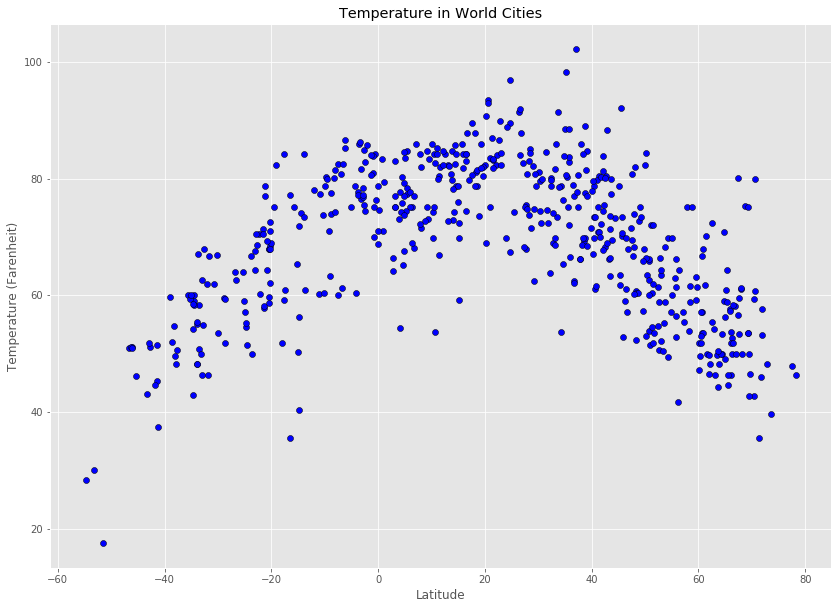

In [78]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], marker="o", facecolors="blue", edgecolor="black")
# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()


## Latitude vs. Humidity Plot

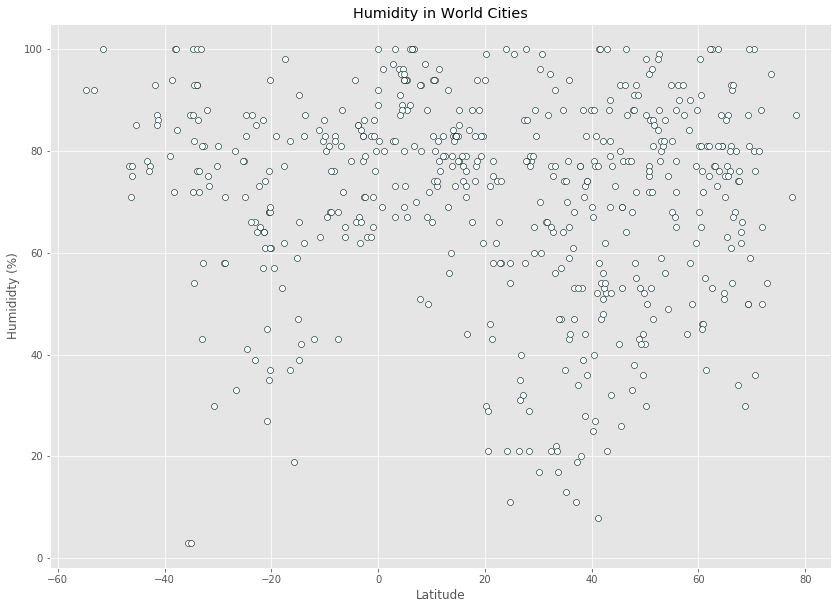

In [85]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker="o", facecolors="azure", edgecolor="black")
# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humididty (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()


In [77]:
weather_data

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Ponta do Sol,PT,1595291491,32.67,-17.10,69.01,64,40,12.75
1,Ushuaia,AR,1595291442,-54.80,-68.30,28.40,92,0,3.36
2,Saint-Philippe,RE,1595291473,-21.36,55.77,57.78,64,90,13.87
3,Avarua,CK,1595291471,-21.21,-159.78,78.80,74,100,19.46
4,Vardø,NO,1595291229,70.37,31.11,59.34,80,100,6.26
...,...,...,...,...,...,...,...,...,...
542,Balta,UA,1595291944,47.94,29.62,60.22,88,0,6.13
543,Vila,PT,1595291544,42.03,-8.16,67.77,82,1,1.12
544,Petropavlovsk-Kamchatskiy,RU,1595291448,53.05,158.65,64.40,59,20,4.47
545,Chetwayi,IN,1595291944,10.53,76.05,75.20,94,75,4.16


## Latitude vs. Cloudiness Plot

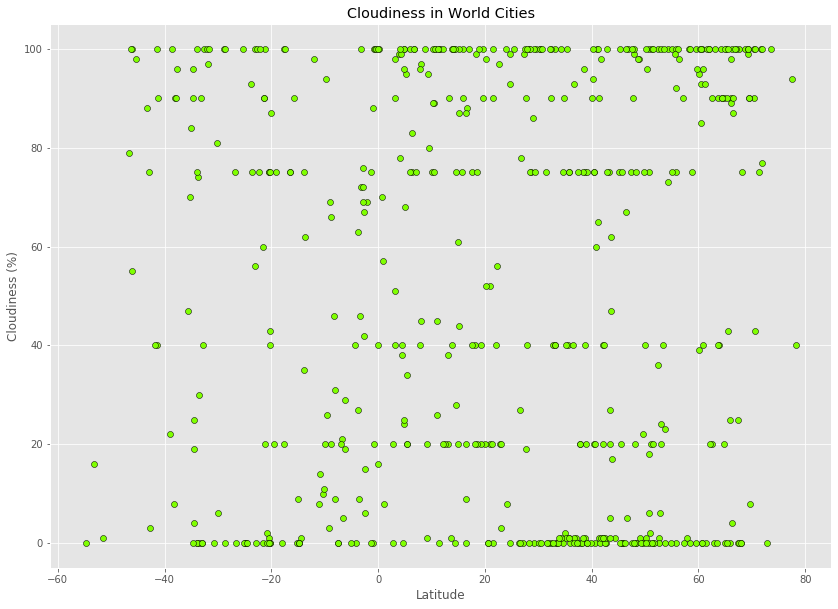

In [90]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o", facecolors="chartreuse", edgecolor="black")
# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

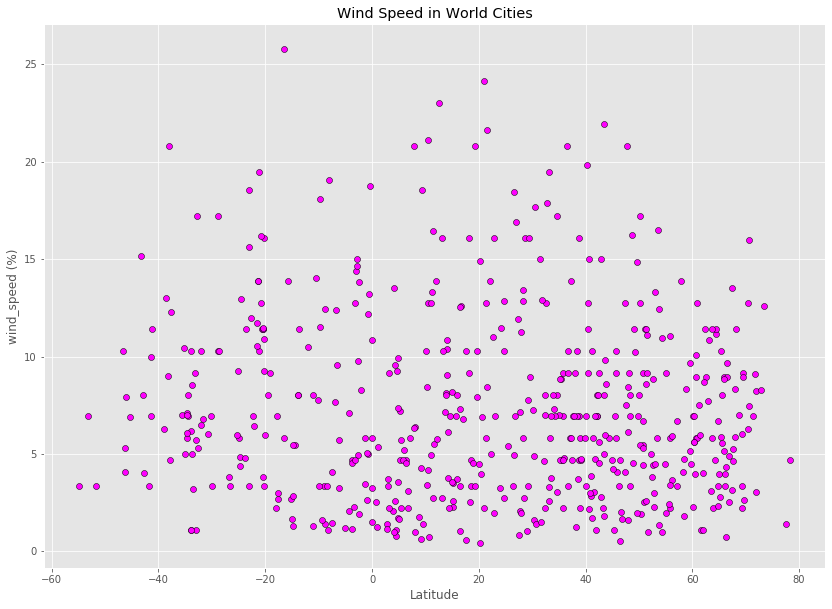

In [91]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o", facecolors="magenta", edgecolor="black")
# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("wind_speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("wind_speedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression